In [14]:
import re
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [15]:
# Load Data
data = pd.read_csv('final_merged_ML.csv')

In [16]:
def clean_text(sentence):
    text = str(sentence).lower().strip()
    text = re.sub(r'[^a-zA-Z ]', '', sentence)  # Remove special characters
    return sentence

In [17]:
data['sentence'] = data['sentence'].astype(str)

In [18]:
# Apply text cleaning
data["clean_sentence"] = data["sentence"].apply(clean_text)

In [19]:
data.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP,clean_sentence
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,That game hurt.
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Man I love reddit.
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,1.0,1.0,0.0,0.0,0,1,1,0,0,"Etenia was nowhere near them, he was by the Fa..."
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Right? Considering it's such an important docu...


In [20]:
# Feature Extraction using TF-IDF with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Unigrams + Bigrams
X_combined = vectorizer.fit_transform(data["clean_sentence"])

In [21]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, data['emotion'], test_size=0.2, random_state=42, stratify=data['emotion']
)

In [22]:
# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [23]:
# Make predictions
y_pred_nb = nb_model.predict(X_test)

In [25]:
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("F1-score:", nb_f1)

F1-score: 0.40811464847889994


In [26]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", nb_accuracy)

Accuracy: 0.49868267875742905


In [27]:
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
print("Precision:", nb_precision)

Precision: 0.491843562042307


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
print("Recall:", nb_recall)

Recall: 0.49868267875742905


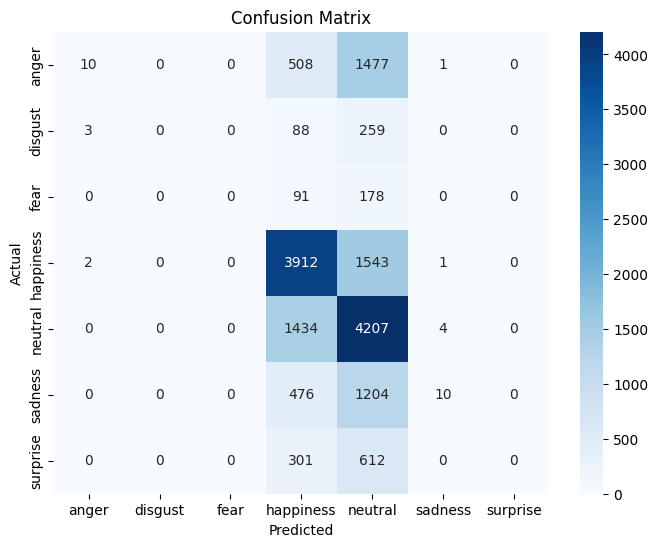

In [29]:
# Confusion Matrix
emotion_labels = sorted(data["emotion"].unique())
cm = confusion_matrix(y_test, y_pred_nb, labels=emotion_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()